In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PreProcessing and EDA

Importing the training and testing csv datasets

In [2]:
train_df = pd.read_csv('train.csv') #full unaltered training data
test_df  = pd.read_csv('test.csv') #full unaltered test data


Seeing the Whole data for reference


In [3]:
train_df

,Id,Therapy Hours,Initial Health Score,Lifestyle Activities,Average Sleep Hours,Follow-Up Sessions,Recovery Index
0,9255,5,49,No,7,5,36
1,1562,2,48,Yes,7,6,25
2,1671,2,81,No,7,2,59
3,6088,2,46,No,6,1,22
4,6670,8,47,No,9,0,40
...,...,...,...,...,...,...,...
7995,5735,8,50,Yes,6,6,48
7996,5192,4,68,No,9,3,51
7997,5391,9,48,No,7,6,44
7998,861,1,47,No,9,0,20


Seeing the Dimensionality of the data

In [4]:
train_df.shape
train_df.describe()

,Id,Therapy Hours,Initial Health Score,Average Sleep Hours,Follow-Up Sessions,Recovery Index
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5012.506875,4.983250,69.531000,6.541625,4.616500,55.311500
std,2887.649416,2.594862,17.343735,1.698493,2.861241,19.202059
min,2.000000,1.000000,40.000000,4.000000,0.000000,10.000000
25%,2512.750000,3.000000,54.750000,5.000000,2.000000,40.000000
50%,5014.500000,5.000000,70.000000,7.000000,5.000000,55.000000
75%,7505.250000,7.000000,85.000000,8.000000,7.000000,71.000000
max,10000.000000,9.000000,99.000000,9.000000,9.000000,100.000000


Seeing the features


In [5]:
train_df.columns

Index(['Id', 'Therapy Hours', 'Initial Health Score', 'Lifestyle Activities',
       'Average Sleep Hours', 'Follow-Up Sessions', 'Recovery Index'],
      dtype='object')

Checking what are the data types of each feature


In [6]:
train_df.dtypes

,0
Id,int64
Therapy Hours,int64
Initial Health Score,int64
Lifestyle Activities,object
Average Sleep Hours,int64
Follow-Up Sessions,int64
Recovery Index,int64


Check for duplicates

In [7]:
duplicates = train_df.duplicated().sum()
duplicates

np.int64(0)

## Checking if there are any nan values


In [8]:
train_df.isna().sum()

,0
Id,0
Therapy Hours,0
Initial Health Score,0
Lifestyle Activities,0
Average Sleep Hours,0
Follow-Up Sessions,0
Recovery Index,0


## Data Pre-processing

As Lifestyle Activities feature is a categorical feature and we convert it into int

In [9]:
train_df['Lifestyle Activities'] = train_df['Lifestyle Activities'].map({'Yes': 1, 'No': 0})
test_df['Lifestyle Activities'] = test_df['Lifestyle Activities'].map({'Yes': 1, 'No': 0})

Just a check if the data type changed or not


In [10]:
train_df.dtypes

,0
Id,int64
Therapy Hours,int64
Initial Health Score,int64
Lifestyle Activities,int64
Average Sleep Hours,int64
Follow-Up Sessions,int64
Recovery Index,int64


Just checking if the conversion was done right or not


In [11]:
train_df.isnull().sum()

,0
Id,0
Therapy Hours,0
Initial Health Score,0
Lifestyle Activities,0
Average Sleep Hours,0
Follow-Up Sessions,0
Recovery Index,0


Check for duplicates again

In [12]:
duplicates = train_df.duplicated().sum()
duplicates

np.int64(0)

### Dropping Id, Recovery Index as there is no use for it


Recovery index because it needs to be predicted, and Id because it is not related to recovery index in any way (we can say this by common sense, and even the data shows little correlation, so keeping it might just worsen the model)

In [13]:
X_train = train_df.drop(['Id', 'Recovery Index'], axis=1) #unstandardised training data used for modeling (tree models)- with id,RI removed
Y_train = train_df['Recovery Index'] #true output of training data
X_test = test_df.drop(['Id'], axis=1) #unstandardised test data used for predictions (tree models)- with id,RI removed

### Standardization


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #standardised training data used for modeling (linear models)
#Regularization penalizes coefficients; unscaled features can bias the penalty toward large-scale features
X_test_scaled = scaler.transform(X_test) #standardised test data used for predictions (linear models)

## EDA

### Plotting a heatmap to check the correlation between the features


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = train_df.corr()
print(corr)

                            Id  Therapy Hours  Initial Health Score  \
Id                    1.000000       0.015780              0.001617   
Therapy Hours         0.015780       1.000000             -0.010861   
Initial Health Score  0.001617      -0.010861              1.000000   
Lifestyle Activities  0.003267       0.003303              0.002665   
Average Sleep Hours   0.004972       0.007221             -0.000245   
Follow-Up Sessions    0.001601       0.014188              0.010707   
Recovery Index        0.008825       0.376255              0.914718   

                      Lifestyle Activities  Average Sleep Hours  \
Id                                0.003267             0.004972   
Therapy Hours                     0.003303             0.007221   
Initial Health Score              0.002665            -0.000245   
Lifestyle Activities              1.000000            -0.020198   
Average Sleep Hours              -0.020198             1.000000   
Follow-Up Sessions           

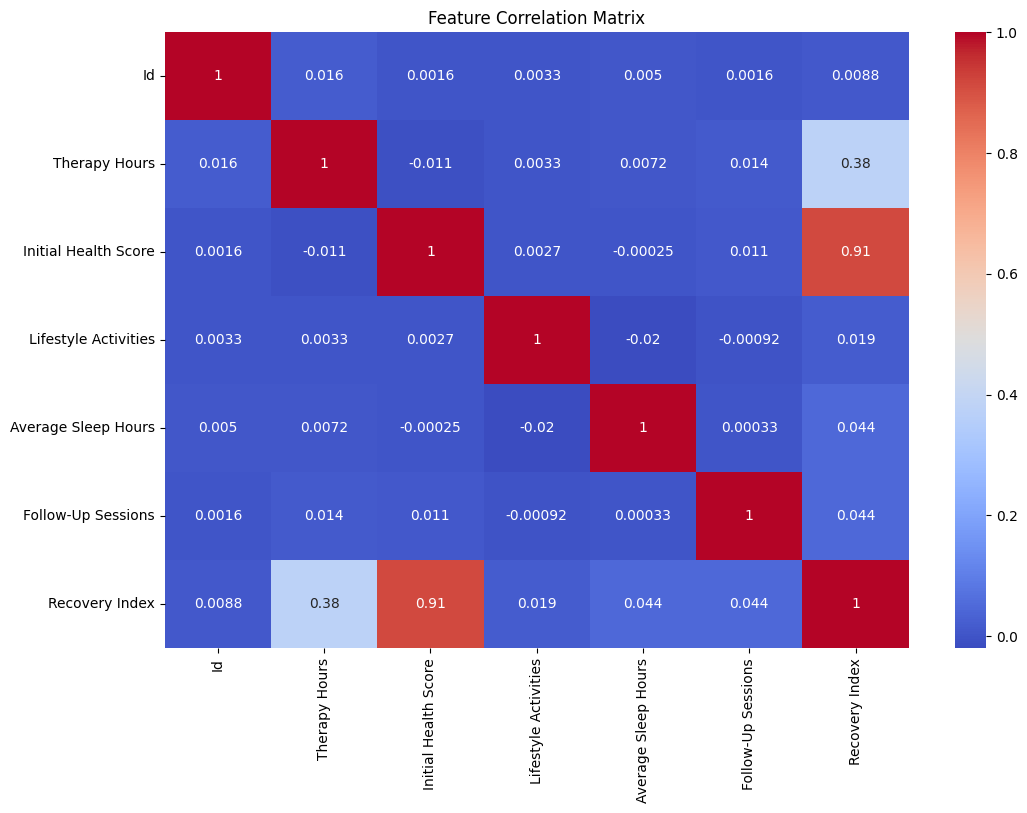

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

### Checking different graphs with relation between different features and recovery index

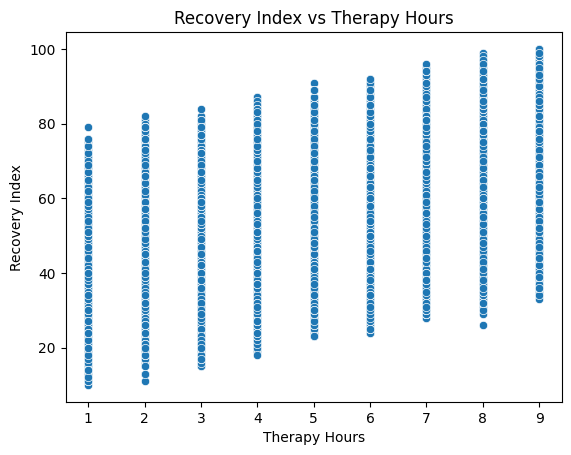

In [17]:
sns.scatterplot(data=train_df, x='Therapy Hours', y='Recovery Index')
plt.title("Recovery Index vs Therapy Hours")
plt.show()

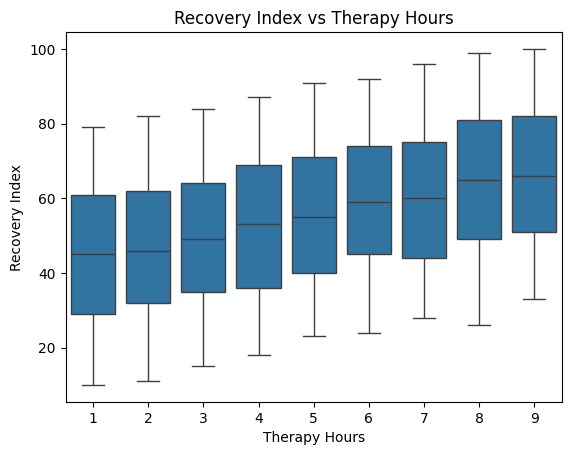

In [18]:
sns.boxplot(data=train_df, x='Therapy Hours', y='Recovery Index')
plt.title("Recovery Index vs Therapy Hours")
plt.show()

no outliers --> no action required

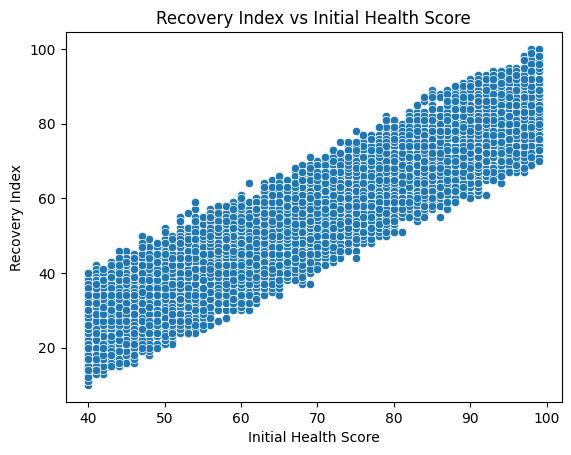

In [19]:
sns.scatterplot(data=train_df, x='Initial Health Score', y='Recovery Index')
plt.title("Recovery Index vs Initial Health Score")
plt.show()

We know from correlation map that initial health score has the highest correlation. From this graph we can also observe it being linearly related to recovery index

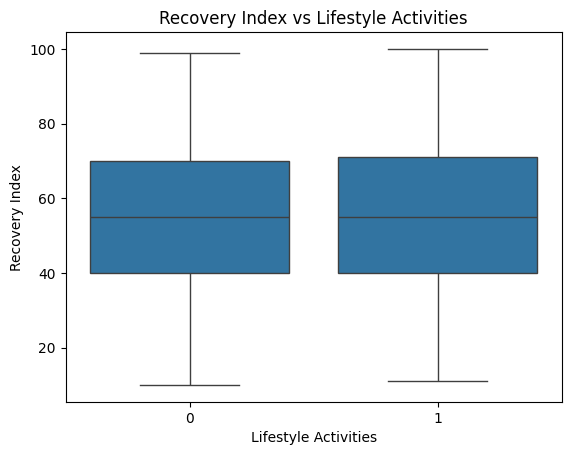

In [20]:
sns.boxplot(data=train_df, x='Lifestyle Activities', y='Recovery Index')
plt.title("Recovery Index vs Lifestyle Activities")
plt.show()

no outliers

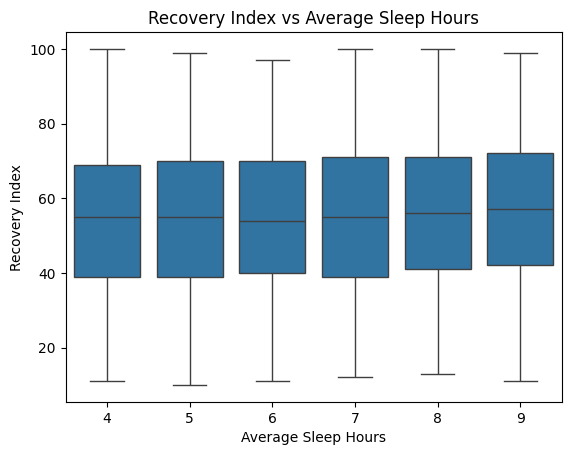

In [21]:
sns.boxplot(data=train_df, x='Average Sleep Hours', y='Recovery Index')
plt.title("Recovery Index vs Average Sleep Hours")
plt.show()

no outliers

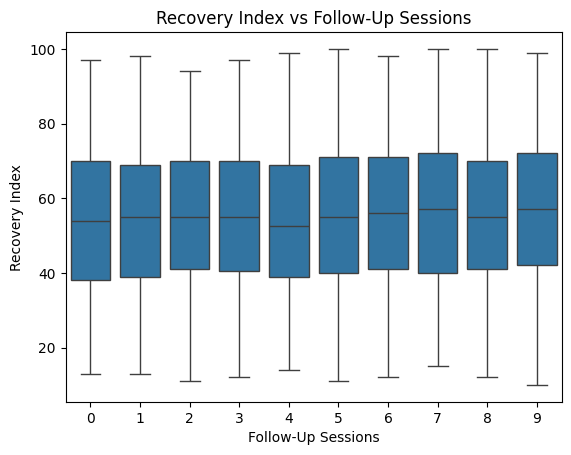

In [22]:
sns.boxplot(data=train_df, x='Follow-Up Sessions', y='Recovery Index')
plt.title("Recovery Index vs Follow-Up Sessions")
plt.show()

Another key takeaway we can observe is that all features are linearly related to Recovery Index (acc to graphs). This is an important observation, as later on, we'll find out that linear regression and other linear models with regularisation fit the best. This is because of this linear relation between features and recovery index.

# Function to test each model

input - model, X, true Y for corresponding X

output - predicted Y, RMSE, R^2 score

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
def evaluate_model(model, X, Y):
    pred_Y = model.predict(X)
    #mae = mean_absolute_error(Y, pred_Y)
    rmse = np.sqrt(mean_squared_error(Y, pred_Y))
    r2 = r2_score(Y, pred_Y)
    return pred_Y, rmse, r2

# LINEAR MODELS

## Dividing the training set into training and validation

using standardised values

(we have also tested with unstandardised values in the same space, but found standardised to give better result, so kept it)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, Y_train, test_size=0.2, random_state=0)
print("Training shape:", X_tr.shape)
print("Validation shape:", X_val.shape)

Training shape: (6400, 5)
Validation shape: (1600, 5)


## Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_tr, y_tr)

preds_lin, rmse_lin, r2_lin = evaluate_model(linreg, X_val, y_val)
print("Linear Regression Performance:")
print(f"RMSE: {rmse_lin:.9f}")
print(f"R²:   {r2_lin:.3f}")

Linear Regression Performance:
RMSE: 2.100407022
R²:   0.988


## Ridge Regression (L2)

Import GridSearchCV for getting best alpha after cross validation (parameter tuning by cross vaidation)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=31, random_state=0)
ridge.fit(X_tr, y_tr)

preds_ridge, rmse_ridge, r2_ridge = evaluate_model(ridge, X_val, y_val)
print("Ridge Regression Performance:")
print(f"RMSE: {rmse_ridge:.9f}")
print(f"R²:   {r2_ridge:.3f}")

Ridge Regression Performance:
RMSE: 2.098414758
R²:   0.988


### Parameter Tuning using GridSearchCV

In [70]:
ridge_params = {'alpha': np.linspace(0, 10, 100)}
ridge = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge.fit(X_tr, y_tr)

preds_ridge, rmse_ridge, r2_ridge = evaluate_model(ridge, X_val, y_val)
print("Ridge Regression Performance:")
print("Best alpha:", ridge.best_params_['alpha'])
print(f"RMSE: {rmse_ridge:.9f}")
print(f"R²:   {r2_ridge:.3f}")

Ridge Regression Performance:
Best alpha: 0.30303030303030304
RMSE: 2.100367635
R²:   0.988


## Lasso Regression (L1)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, random_state=0)
lasso.fit(X_tr, y_tr)

preds_lasso, rmse_lasso, r2_lasso = evaluate_model(lasso, X_val, y_val)
print("Lasso Regression Performance:")
print(f"RMSE: {rmse_lasso:.9f}")
print(f"R²:   {r2_lasso:.3f}")

Lasso Regression Performance:
RMSE: 2.100256235
R²:   0.988


### Parameter Tuning using GridSearchCV

In [141]:
lasso_params = {'alpha': np.logspace(-3,1,10)}
lasso = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso.fit(X_tr, y_tr)

preds_lasso, rmse_lasso, r2_lasso = evaluate_model(lasso, X_val, y_val)
print("Lasso Regression Performance:")
print("Best alpha:", lasso.best_params_['alpha'])
print(f"RMSE: {rmse_lasso:.9f}")
print(f"R²:   {r2_lasso:.3f}")

Lasso Regression Performance:
Best alpha: 0.001
RMSE: 2.100442655
R²:   0.988


Another key observation here is that ridge regularization is better than lasso, implying that recovery index depends on all features, and making some of the coefficients 0 is not helpful.

## Elastic Net (L1 + L2)

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=0)
elastic.fit(X_tr, y_tr)

preds_elastic, rmse_elastic, r2_elastic = evaluate_model(elastic, X_val, y_val)
print("Elastic Net Performance:")
print(f"RMSE: {rmse_elastic:.3f}")
print(f"R²:   {r2_elastic:.3f}")

Elastic Net Performance:
RMSE: 2.272
R²:   0.986


In [74]:
params = {'alpha': np.logspace(-3, 1, 10), # from 0.001 to 10
          'l1_ratio': np.linspace(0, 1, 10)  # from 0 (ridge) to 1 (lasso)
        }
elastic = GridSearchCV(ElasticNet(), params, cv=5, n_jobs = -1)
elastic.fit(X_tr, y_tr)

preds_elastic, rmse_elastic, r2_elastic = evaluate_model(elastic, X_val, y_val)
print("elastic Regression Performance:")
print(f"RMSE: {rmse_elastic:.9f}")
print(f"R²:   {r2_elastic:.3f}")
print("Best params: ", elastic.best_params_)

NameError: name 'ElasticNet' is not defined

## Linear Regression Coefficients

In [ ]:
coef = pd.Series(linreg.coef_, index=X_train.columns)
print('Linear Regression Coefficients:')
print(coef.sort_values(ascending=False))

Linear Regression Coefficients:
Initial Health Score    17.656503
Therapy Hours            7.403776
Average Sleep Hours      0.810510
Follow-Up Sessions       0.546609
Lifestyle Activities     0.296156
dtype: float64


## Polynomial Regression

We are only going to try out degree 2 as any more would definitely cause overfitting (afterall the features are pretty linearly related, we are just doing this for some mild non linear effects

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_tr_poly = poly.fit_transform(X_tr)
X_val_poly = poly.transform(X_val)

#Fit linear regression on transformed data
linreg_poly = LinearRegression()
linreg_poly.fit(X_tr_poly, y_tr)

preds_poly, rmse_poly, r2_poly = evaluate_model(linreg_poly, X_val_poly, y_val)

print("Polynomial Regression Performance:")
print(f"RMSE: {rmse_poly:.9f}")
print(f"R²:   {r2_poly:.3f}")

Polynomial Regression Performance:
RMSE: 2.102844647
R²:   0.988


In [ ]:
from sklearn.pipeline import Pipeline
params = {
    'poly__degree': [1, 2, 3, 4, 5],  # test polynomial degrees
}
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

linreg_polybest = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
linreg_polybest.fit(X_tr, y_tr)

preds_polybest, rmse_polybest, r2_polybest = evaluate_model(linreg_polybest, X_val, y_val)
print("Polynomial Regression Performance:")
print(f"RMSE: {rmse_polybest:.9f}")
print(f"R²:   {r2_polybest:.3f}")
print("Best params: ", linreg_polybest.best_params_)

Polynomial Regression Performance:
RMSE: 2.100407022
R²:   0.988
Best params:  {'poly__degree': 1}


# Tree Models

## Dividing the training set into training and validation

Using unstandardised values

(as trees are based on decisions, standardising is not necessary as the tree is split accordingly anyways)

In [129]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
print("Training shape:", X_tr.shape)
print("Validation shape:", X_val.shape)

Training shape: (6400, 5)
Validation shape: (1600, 5)


In [ ]:
from sklearn.model_selection import GridSearchCV

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_tr, y_tr)

preds_dt, rmse_dt, r2_dt = evaluate_model(dt, X_val, y_val)
print("Decision Tree Performance:")
print(f"RMSE: {rmse_dt:.3f}")
print(f"R²:   {r2_dt:.3f}")


Decision Tree Performance:
RMSE: 3.043
R²:   0.975


### Parameter Tuning using GridSearchCV

In [ ]:
params = {"max_depth": [None, 5, 10, 20],
"min_samples_split": [2, 5, 10],
"min_samples_leaf": [1, 2, 4]}

dt = GridSearchCV(DecisionTreeRegressor(random_state=0), params, cv=5)
dt.fit(X_tr, y_tr)

preds_dt, rmse_dt, r2_dt = evaluate_model(dt, X_val, y_val)
print("Decision Tree Performance:")
print(f"RMSE: {rmse_dt:.3f}")
print(f"R²:   {r2_dt:.3f}")
print("Best params: ", dt.best_params_)

Decision Tree Performance:
RMSE: 2.532
R²:   0.982
Best params:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


## Random-Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=0,
    n_jobs=-1
)

rf.fit(X_tr, y_tr)


preds_rf, rmse_rf, r2_rf = evaluate_model(rf, X_val, y_val)
print("Random Forest Performance:")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R²:   {r2_rf:.3f}")

Random Forest Performance:
RMSE: 2.415
R²:   0.984


### Parameter Tuning using GridSearchCV

In [ ]:
params = {"n_estimators": [50, 100, 200],
          "max_depth": [None, 5, 10],
          "min_samples_split": [2, 5],
          "min_samples_leaf": [1, 2],
          "max_features": [1, "sqrt", "log2"]}


rf = GridSearchCV(RandomForestRegressor(random_state=0,n_jobs=-1), params, cv=5)
rf.fit(X_tr, y_tr)

preds_rf, rmse_rf, r2_rf = evaluate_model(rf, X_val, y_val)
print("Random Forest Performance:")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R²:   {r2_rf:.3f}")
print("Best params: ", rf.best_params_)

Random Forest Performance:
RMSE: 2.415
R²:   0.984
Best params:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


## XGBoost

Note that hyper parameter tuning is done in the same cell by changing and observing results

In [ ]:
#!pip install xgboost

In [131]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05555,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=0,
)
xgb.fit(X_tr, y_tr)

preds_xgb, rmse_xgb, r2_xgb = evaluate_model(xgb, X_val, y_val)
print("XGBoost Performance:")
print(f"RMSE: {rmse_xgb:.9f}")
print(f"R²:   {r2_xgb:.3f}")

XGBoost Performance:
RMSE: 2.161149912
R²:   0.987


### Parameter Tuning using GridSearchCV

In [130]:
params = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": np.linspace(0,0.08,8),
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]}

xgb = GridSearchCV(XGBRegressor(random_state=0), params,n_jobs=-1, cv=5)
xgb.fit(X_tr, y_tr)

preds_xgb, rmse_xgb, r2_xgb = evaluate_model(xgb, X_val, y_val)
print("XGBoost Performance:")
print(f"RMSE: {rmse_xgb:.3f}")
print(f"R²:   {r2_xgb:.3f}")
print("Best params: ", xgb.best_params_)

XGBoost Performance:
RMSE: 2.139
R²:   0.987
Best params:  {'colsample_bytree': 0.8, 'learning_rate': np.float64(0.06857142857142857), 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}


 ## Feature Importance (from Random Forest)

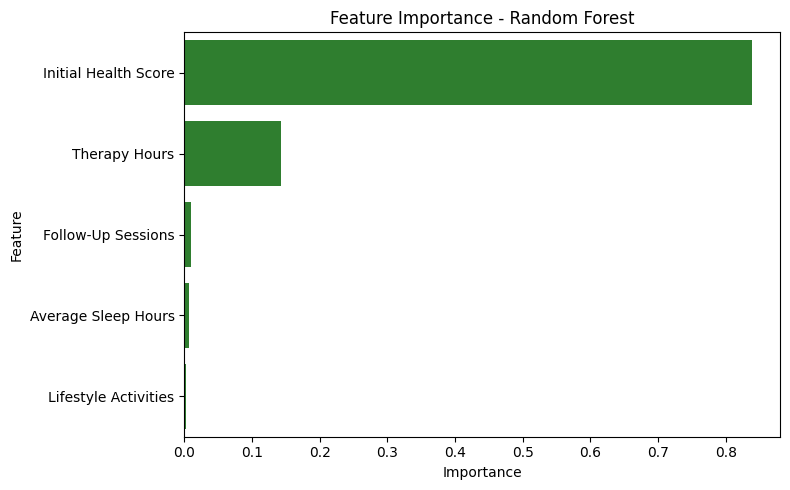

In [ ]:
best_rf = rf.best_estimator_
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, color='forestgreen')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Model Comparision

In [ ]:
results = [
    ("Linear", rmse_lin, r2_lin),
    ("Ridge", rmse_ridge, r2_ridge),
    ("Lasso", rmse_lasso, r2_lasso),
    ("Ploynomial", rmse_poly, r2_poly),
    ("Elastic", rmse_elastic, r2_elastic),
    ("DTree", rmse_dt, r2_dt),
    ("RF", rmse_rf, r2_rf),
    ("XGBoost", rmse_xgb, r2_xgb),
]

results_sorted = sorted(results, key=lambda x: x[2], reverse=True)
model_names = [x[0] for x in results_sorted]

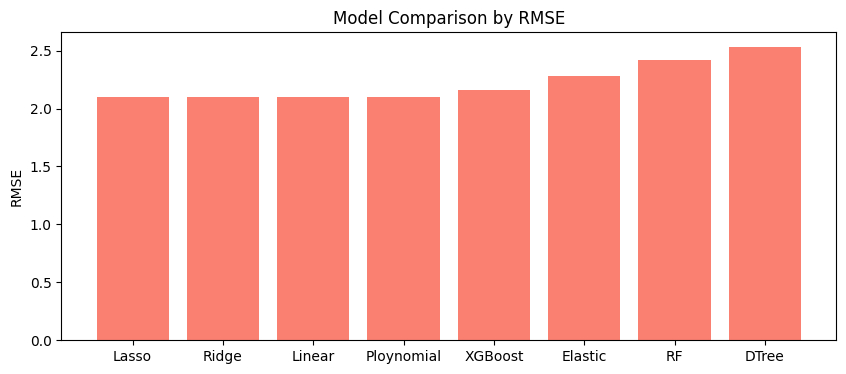

In [ ]:
rmse_scores = [x[1] for x in results_sorted]

plt.figure(figsize=(10,4))
plt.bar(model_names, rmse_scores, color='salmon')
plt.ylabel('RMSE')
plt.title('Model Comparison by RMSE')
plt.show()

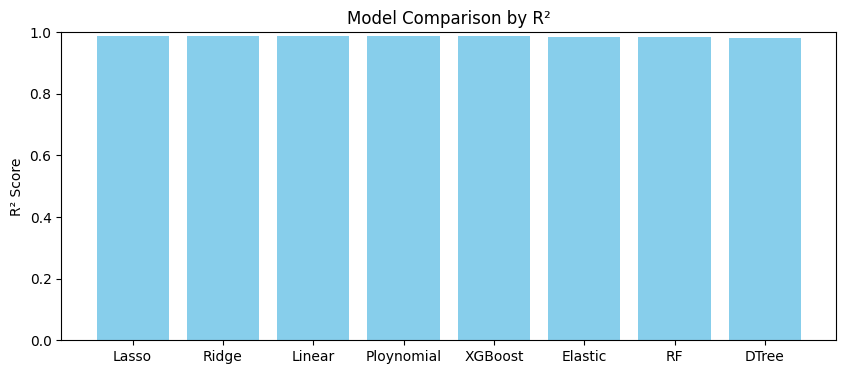

In [ ]:
r2_scores = [x[2] for x in results_sorted]

plt.figure(figsize=(10,4))
plt.bar(model_names, r2_scores, color='skyblue')
plt.ylabel('R² Score')
plt.title('Model Comparison by R²')
plt.ylim(0, 1)
plt.show()

In [ ]:
results_df = pd.DataFrame(results_sorted, columns=["Model", "RMSE", "R²"])
results_df

,Model,RMSE,R²
0,Lasso,2.100380,0.987902
1,Ridge,2.100394,0.987902
2,Linear,2.100407,0.987902
3,Ploynomial,2.102845,0.987874
4,XGBoost,2.159942,0.987206
5,Elastic,2.283961,0.985695
6,RF,2.415086,0.984005
7,DTree,2.531674,0.982424


In [ ]:
results_df.to_csv('model_comparison.csv', index=False)

We can see that as predicted in EDA, linear regression works the best

# Submission Files Generation

This part is used to generate submission files in the required format, using the models trained earlier above

In [115]:
X_test

,Therapy Hours,Initial Health Score,Lifestyle Activities,Average Sleep Hours,Follow-Up Sessions
0,5,69,0,8,2
1,2,46,1,4,8
2,7,56,1,7,5
3,6,42,1,8,5
4,7,53,0,4,6
...,...,...,...,...,...
1995,2,70,0,7,3
1996,4,79,0,9,3
1997,2,40,1,7,2
1998,3,83,0,7,5


In [165]:
#X_t = poly.transform(X_test_scaled)
preds = bagged_ridge.predict(X_test)

In [166]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "Recovery Index": preds
})
submission

,Id,Recovery Index
0,6253,54.709531
1,4685,22.563789
2,1732,47.870010
3,4743,31.234976
4,4522,42.990567
...,...,...
1995,6413,46.880537
1996,8286,62.701712
1997,7854,16.736245
1998,1096,63.352002


In [167]:
submission.to_csv('submission_baggedridge.csv', index=False)

STACKING REGRESSOR

In [154]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor

#ridge = Ridge(alpha=0.1)
#rf = RandomForestRegressor(n_estimators=200, random_state=42)

# --- stacking model ---
stack = StackingRegressor(
    estimators=[
        ('ridge', ridge),
        ('rf', rf),
        ('xgb', xgb)
    ],
    final_estimator=LinearRegression(),
    passthrough=True
)

# --- pipeline (scaling optional) ---
pipe = Pipeline([
    ('model', stack)
])

# --- train ---
pipe.fit(X_tr, y_tr)

# --- evaluate ---
preds_stack, rmse_stack, r2_stack = evaluate_model(pipe, X_val, y_val)

print("Stacking Regressor Performance:")
print(f"RMSE: {rmse_stack:.9f}")
print(f"R²:   {r2_stack:.3f}")


Stacking Regressor Performance:
RMSE: 2.097354926
R²:   0.988


This is not showing any improvement in test score though, because linear is dominating predominantly.

# Bagging

In [164]:
from sklearn.ensemble import BaggingRegressor
bagged_ridge = BaggingRegressor(
    estimator= ridge,
    n_estimators=100,      # number of Ridge models
    max_samples=0.8,      # fraction of training data per model
    max_features=1.0,     # fraction of features per model
    random_state=0,
    n_jobs=-1
)
bagged_ridge.fit(X_tr, y_tr)
preds_bag, rmse_bag, r2_bag = evaluate_model(bagged_ridge, X_val, y_val)

print("Bagging Regressor Performance:")
print(f"RMSE: {rmse_bag:.9f}")
print(f"R²:   {r2_bag:.3f}")


Bagging Regressor Performance:
RMSE: 2.100434494
R²:   0.988
